# Libraries

In [ ]:
import sys, os

import numpy as np
import pandas as pd
import os
import urllib
import zipfile
import shutil
 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from sklearn.datasets import dump_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF

In [ ]:
#!pip install surprise
from surprise import KNNBasic
from surprise import Reader
from surprise import Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [ ]:
import random
random.seed(4212)

In [ ]:
from surprise import SVD,NMF
from surprise import Dataset
from surprise import accuracy
from sklearn.metrics import mean_absolute_error
from surprise.model_selection import train_test_split

# Loading data

In [ ]:
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/drive')
    path_to_file = '/content/drive/MyDrive/DSA4212_Assignment2/datasets'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

Mounted at /content/drive
/content/drive/MyDrive/DSA4212_Assignment2/datasets
/content/drive/.shortcut-targets-by-id/1sKnwfHp4YEyYFgL7Arxyl1vY9sS5U5dH/DSA4212_Assignment2/datasets


In [ ]:
ratings = pd.read_table("ratings.dat",sep = '::',header=None,engine='python',names=['user_id','movie_id',"rating","timestamp"])
users = pd.read_table("users.dat",sep = '::',header=None,engine='python',names =['user_id','gender','age','occupation','zipcode'])
movies = pd.read_table('movies.dat', sep='::', header=None, engine='python', encoding='ISO-8859-1',names=['movie_id','movie_title','genre'])#.to_numpy()

# Matrix Factorisation method

## Neural Net

In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
movies

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
movies_2 = np.array(movies)

In [ ]:
for i in movies_2:
  i[2]= i[2].split('|')

In [ ]:
genre_list = {'Action':0, 'Adventure':1, 'Animation':2, "Children's":3, 'Comedy':4, 'Crime':5, 'Documentary':6, 'Drama':7, 'Fantasy':8, 'Film-Noir':9, 'Horror':10, 'Musical':11, 'Mystery':12, 'Romance':13, 'Sci-Fi':14, 'Thriller':15, 'War':16, 'Western':17}

In [ ]:
for i in movies_2:
  for j in range(len(i[2])):
    i[2][j] = genre_list[i[2][j]]

In [ ]:
movies 

array([[1, 'Toy Story (1995)', list([2, 3, 4])],
       [2, 'Jumanji (1995)', list([1, 3, 8])],
       [3, 'Grumpier Old Men (1995)', list([4, 13])],
       ...,
       [3950, 'Tigerland (2000)', list([7])],
       [3951, 'Two Family House (2000)', list([7])],
       [3952, 'Contender, The (2000)', list([7, 15])]], dtype=object)

In [ ]:
genres = []
for i in movies_2:
  genre = []
  for j in range(len(i[2])):
    if j == 0:
      for k in range(i[2][j]):
        genre.append(0)
      genre.append(1)
      if j == len(i[2])-1:
        for s in range(17-i[2][j]):
          genre.append(0)
    else:
      for k in range(i[2][j]-i[2][j-1]-1):
        genre.append(0)
      genre.append(1)
      if j == len(i[2])-1:
          for s in range(17-i[2][j]):
            genre.append(0)
  genres.append(genre)

In [ ]:
genres

In [ ]:
for i in range(len(movies_2)):
  movies_2[i][2]=genres[i]

In [ ]:
movies

,movie_id,movie_title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
dfs = []
for i in movies_2:
  movie=[]
  movie.append(i[0])
  movie.append(i[1])
  for j in range(18):
    movie.append(i[2][j])
  dfs.append(movie)

In [ ]:
movies_2 = pd.DataFrame(dfs, columns=['movie_id','title','Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])


In [ ]:
movies_2

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies["year"] = movies["movie_title"].str[-5:-1]
movies["movie_title"] = movies["movie_title"].str[:-7]

In [ ]:
movies

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,Jumanji,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,Grumpier Old Men,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,Waiting to Exhale,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
4,5,Father of the Bride Part II,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
3879,3949,Requiem for a Dream,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2000
3880,3950,Tigerland,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2000
3881,3951,Two Family House,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2000


In [ ]:
users_rating=pd.merge(users,ratings,on='user_id')

In [ ]:
users_rating

,user_id,gender,age,occupation,zipcode,movie_id,rating,timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [ ]:
dataset=pd.merge(users_rating,movies,on='movie_id')

In [ ]:
dataset

,user_id,gender,age,occupation,zipcode,movie_id,rating,timestamp,movie_title,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest,0,...,0,0,0,0,0,0,0,0,0,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations,0,...,0,0,0,0,0,0,0,0,0,1998
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels,0,...,0,0,0,0,0,0,0,0,0,1998
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys,0,...,0,0,0,0,0,0,0,0,0,1999
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian,0,...,0,0,0,0,0,0,0,0,1,1973


In [ ]:
dataset.drop(['timestamp'], axis=1,inplace=True)

In [ ]:
dataset1=dataset.drop(['zipcode','movie_title'],axis=1)

In [ ]:
dataset1.gender[dataset1.gender == 'M'] = 1
dataset1.gender[dataset1.gender == 'F'] = 0

In [ ]:
dataset1

,user_id,gender,age,occupation,movie_id,rating,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,1,10,1193,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
1,2,1,56,16,1193,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
2,12,1,25,12,1193,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
3,15,1,25,7,1193,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
4,17,1,50,1,1193,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,1,18,17,2198,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1000205,5675,1,35,14,2703,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1000206,5780,1,18,17,2845,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1999
1000207,5851,0,18,20,3607,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1973


In [ ]:
dataset1.user_id = dataset1.user_id.astype('category').cat.codes.values
dataset1.movie_id = dataset1.movie_id.astype('category').cat.codes.values

In [ ]:
train, test = train_test_split(dataset1, test_size=0.1)

In [ ]:
n_users, n_movies = len(dataset1.user_id.unique()), len(dataset1.movie_id.unique())


In [ ]:
keras.backend.clear_session()

movie_input = keras.layers.Input(shape=[1],name='Movie')

movie_embedding = keras.layers.Embedding(n_movies + 1, 20, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
 
user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1,20,name='User-Embedding')(user_input))
 
prod = keras.layers.dot([movie_vec, user_vec], axes=1,name='DotProduct')
model = keras.Model([user_input, movie_input], prod)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 20)        74140       ['Movie[0][0]']                  
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 20)        120820      ['User[0][0]']                   
                                                                                              

In [ ]:
history=model.fit([train['user_id'], train['movie_id']], train.rating, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
28131/28131 [==============================] - 106s 4ms/step - loss: 0.9236 - mae: 0.7569 - mse: 0.9236
Epoch 2/30
28131/28131 [==============================] - 108s 4ms/step - loss: 0.8617 - mae: 0.7316 - mse: 0.8617
Epoch 3/30
28131/28131 [==============================] - 102s 4ms/step - loss: 0.8042 - mae: 0.7048 - mse: 0.8042
Epoch 4/30
28131/28131 [==============================] - 102s 4ms/step - loss: 0.7591 - mae: 0.6828 - mse: 0.7591
Epoch 5/30
28131/28131 [==============================] - 101s 4ms/step - loss: 0.7199 - mae: 0.6634 - mse: 0.7199
Epoch 6/30
28131/28131 [==============================] - 103s 4ms/step - loss: 0.6884 - mae: 0.6473 - mse: 0.6884
Epoch 7/30
28131/28131 [==============================] - 100s 4ms/step - loss: 0.6642 - mae: 0.6348 - mse: 0.6642
Epoch 8/30
28131/28131 [==============================] - 100s 4ms/step - loss: 0.6459 - mae: 0.6253 - mse: 0.6459
Epoch 9/30
28131/28131 [==============================] - 99s 4ms/step - loss: 0

In [ ]:
model.predict([train.user_id[:3], train.movie_id[:3]])

array([[2.2125165],
       [4.10653  ],
       [3.772138 ]], dtype=float32)

In [ ]:
train.rating[:3]

943755    1
311661    4
242849    3
Name: rating, dtype: int64

Text(0, 0.5, 'Training Error')

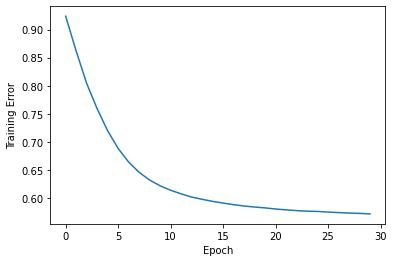

In [ ]:
pd.Series(history.history['loss']).plot()
plt.xlabel("Epoch")
plt.ylabel("Training Error")

In [ ]:
results = model.evaluate((test.user_id, test.movie_id), test.rating, batch_size=1)

100021/100021 [==============================] - 173s 2ms/step - loss: 0.8911 - mae: 0.7280 - mse: 0.8911


In [ ]:
movie_embedding_learnt = model.get_layer(name='Movie-Embedding').get_weights()[0]

In [ ]:
user_embedding_learnt = model.get_layer(name='User-Embedding').get_weights()[0]

In [ ]:
def recommend(user_id, number_of_movies=5):
  movies = user_embedding_learnt[user_id]@movie_embedding_learnt.T
  mids = np.argpartition(movies, -number_of_movies)[-number_of_movies:]
  return mids

In [ ]:
recommend(user_id=1)

array([ 892,  346, 1437, 2750, 2238])

## SVD

In [ ]:
data = Dataset.load_builtin(name='ml-1m', prompt=False)

In [ ]:
trainset, testset = train_test_split(data, test_size=.1)

In [ ]:
algo = SVD()

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)

In [ ]:
algo.predict('1', '5001')

In [ ]:
def get_top10_recommendation(user_id):
  estimated_ratings= []
  for i in range(6041):
    estimated_ratings.append([i+1,algo.predict(str(user_id),str(i)).est])
  ratings_user = ratings[ratings.user_id == user_id]
  movie_list = ratings_user.movie_id.tolist()
  for j in estimated_ratings:
    if j[0] in movie_list:
      estimated_ratings.remove(j)
  estimate = pd.DataFrame(estimated_ratings,columns = ['movie_id','estimated_rating'])
  sorted = estimate.sort_values(['estimated_rating', 'movie_id',], ascending=False).head(10).copy()
  movies=pd.merge(sorted,movie_only,right_on='movie_id',left_index=True)
  return movies[['movie_id','movie_title','estimated_rating']]

In [ ]:
get_top10_recommendation(2)

## NMF

In [ ]:
data = Dataset.load_builtin(name='ml-1m', prompt=False)

Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-1m.zip...
Done! Dataset ml-1m has been saved to /root/.surprise_data/ml-1m


In [ ]:
trainset, testset = train_test_split(data, test_size=.1)

In [ ]:
nmf = NMF()
nmf.fit(trainset)
predictions_NMF = nmf.test(testset)

accuracy.rmse(predictions_NMF)

RMSE: 0.9164


0.9163641229196393

# Memory based methods

## user-based cosine method

In [ ]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(ratings, test_size=.1)

In [ ]:
movies.columns = ['movie_id', 'title', 'genre']

In [ ]:
ratings_c = trainset.merge(movies, how = 'left', on = 'movie_id')
ratings_c = ratings_c[['user_id', 'movie_id', 'rating']]
ratings_c.head()

,user_id,movie_id,rating
0,5689,3071,5
1,2255,364,4
2,1883,549,3
3,1284,1051,4
4,4379,2485,3


In [ ]:
#add dummy user
m_id = list(range(0, 3952))
dummy = pd.DataFrame({'user_id':6041, 'movie_id':m_id, 'rating':0})

In [ ]:
ratings_c = ratings_c.append(dummy, ignore_index = True)

In [ ]:
table = pd.pivot_table(ratings_c, values='rating', index='user_id', columns=['movie_id'])
table.replace(np.nan, 0, inplace = True)
table.head()

movie_id,0,1,2,3,4,5,6,7,8,9,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
table.shape

(6041, 3953)

In [ ]:
testset.head()

,user_id,movie_id,rating,timestamp
427671,2598,1619,2,973793516
157723,1015,2245,4,981863173
301967,1794,2236,3,974704705
879823,5317,237,3,972359234
173383,1099,1037,1,974926618


In [ ]:
def predict_rating(user_id, movie_id, k = 10, score = 1): 
  #score of 1 means take rating as avg rating of top k users, 2 means take weighted avg
  df = table[table.iloc[:, movie_id-1]!=0]

  if len(df) == 0: #nobody has rated it before, take avg ratings of this user
    rt = ratings[ratings.user_id == user_id].rating.tolist()
    return sum(rt)/len(rt)

  users_record = table.loc[user_id,:]
  users_record[movie_id - 1] = 0
  df = df.append(users_record)
  sim = cosine_similarity(df)
  top_k_users = (-sim[-1]).argsort()[:k+1][1:]
  k_ratings = df.iloc[top_k_users, movie_id-1].tolist()

  if score == 1:
    rating = sum(k_ratings)/len(k_ratings)
  else:
    sim_score = [sim[-1][i] for i in top_k_users]
    k_ratings_weighted = [sim_score[i]*k_ratings[i] for i in list(range(0, min(k, len(top_k_users))))]
    rating = sum(k_ratings_weighted)/sum(sim_score)
  
  return rating

In [ ]:
def cosine_model(testset = testset, k = 10, score = 1):
  y_pred = testset.apply(lambda row:
              predict_rating(row['user_id'], row['movie_id'], k = k, score = score),
              axis = 1).tolist()
  return mean_squared_error(testset.rating.tolist(), y_pred, squared=False)

In [ ]:
cosine_model(testset = testset.head(2000), k=10, score = 2)

1.2874156174276337

In [ ]:
cosine_model(testset = testset.head(2000), k=10, score = 1)

1.2964056770295678

## KNN



In [ ]:
reader = Reader(rating_scale=(1, 5))

In [ ]:
data = Dataset.load_from_df(trainset[['user_id', 'movie_id', 'rating']], reader)

In [ ]:
knn1 = KNNBasic()
knn1.fit(data.build_full_trainset())

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
knn_pred1 = []
for uid, mid in zip(testset.user_id.tolist(), testset.movie_id.tolist()):
  knn_pred1.append(knn1.predict(uid, mid, r_ui=4, verbose=True).est)

In [ ]:
knn_pred1[0]

4.460748701250135

In [ ]:
mean_squared_error(testset.rating.tolist(), knn_pred1, squared=False)

0.9213566934053884

In [ ]:
knn2 = KNNBasic(sim_options = {'name':'pearson_baseline'})
knn2.fit(data.build_full_trainset())

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
knn_pred2 = []
for uid, mid in zip(testset.user_id.tolist(), testset.movie_id.tolist()):
  knn_pred2.append(knn2.predict(uid, mid, r_ui=4, verbose=True).est)

In [ ]:
knn_pred2[0]

4.108248675964748

In [ ]:
mean_squared_error(testset.rating.tolist(), knn_pred2, squared=False)

0.9248793131734993

In [ ]:
knn3 = KNNBasic(sim_options = {'name':'cosine'})
knn3.fit(data.build_full_trainset())

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
knn_pred3 = []
for uid, mid in zip(testset.user_id.tolist(), testset.movie_id.tolist()):
  knn_pred3.append(knn3.predict(uid, mid, r_ui=4, verbose=True).est)

In [ ]:
knn_pred3[1]

3.5758175752991286

In [ ]:
mean_squared_error(testset.rating.tolist(), knn_pred3, squared=False)

0.9786420722582226

# Content-based NLP-cosine method

In [ ]:
avg_ratings=ratings.groupby(['movie_id']).mean()
count_rating=ratings.groupby(['movie_id']).size()

In [ ]:
avg_ratings['count']=count_rating

In [ ]:
avg_ratings.drop(['timestamp','user_id'], axis=1,inplace=True)

In [ ]:
users.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
movies

array([[1, 'Toy Story (1995)', "Animation|Children's|Comedy"],
       [2, 'Jumanji (1995)', "Adventure|Children's|Fantasy"],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [3950, 'Tigerland (2000)', 'Drama'],
       [3951, 'Two Family House (2000)', 'Drama'],
       [3952, 'Contender, The (2000)', 'Drama|Thriller']], dtype=object)

In [ ]:
for i in movies:
  i[2]= i[2].split('|')

In [ ]:
movies

array([[1, 'Toy Story (1995)',
        list(['Animation', "Children's", 'Comedy'])],
       [2, 'Jumanji (1995)',
        list(['Adventure', "Children's", 'Fantasy'])],
       [3, 'Grumpier Old Men (1995)', list(['Comedy', 'Romance'])],
       ...,
       [3950, 'Tigerland (2000)', list(['Drama'])],
       [3951, 'Two Family House (2000)', list(['Drama'])],
       [3952, 'Contender, The (2000)', list(['Drama', 'Thriller'])]],
      dtype=object)

In [ ]:
dfs = []
for i in movies:
  movie=[]
  movie.append(i[0])
  movie.append(i[1])
  movie.append(i[2])
  dfs.append(movie)

In [ ]:
movies = pd.DataFrame(dfs, columns=['movie_id','movie_title','genre'])


In [ ]:
movies

,movie_id,movie_title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy]
3879,3949,Requiem for a Dream (2000),[Drama]
3880,3950,Tigerland (2000),[Drama]
3881,3951,Two Family House (2000),[Drama]


In [ ]:
movies["year"] = movies["movie_title"].str[-5:-1]
movies["movie_title"] = movies["movie_title"].str[:-7]

In [ ]:
movies

,movie_id,movie_title,genre,year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995
...,...,...,...,...
3878,3948,Meet the Parents,[Comedy],2000
3879,3949,Requiem for a Dream,[Drama],2000
3880,3950,Tigerland,[Drama],2000
3881,3951,Two Family House,[Drama],2000


In [ ]:
avg_ratings

,rating,count
movie_id,,
1,4.146846,2077
2,3.201141,701
3,3.016736,478
4,2.729412,170
5,3.006757,296
...,...,...
3948,3.635731,862
3949,4.115132,304
3950,3.666667,54


In [ ]:
movies=pd.merge(movies,avg_ratings,left_on='movie_id',right_index=True)
  

In [ ]:
movies

,movie_id,movie_title,genre,year,rating,count
0,1,Toy Story,"[Animation, Children's, Comedy]",1995,4.146846,2077
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995,3.201141,701
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,3.016736,478
3,4,Waiting to Exhale,"[Comedy, Drama]",1995,2.729412,170
4,5,Father of the Bride Part II,[Comedy],1995,3.006757,296
...,...,...,...,...,...,...
3878,3948,Meet the Parents,[Comedy],2000,3.635731,862
3879,3949,Requiem for a Dream,[Drama],2000,4.115132,304
3880,3950,Tigerland,[Drama],2000,3.666667,54
3881,3951,Two Family House,[Drama],2000,3.900000,40


In [ ]:
movies.rating=str(movies.rating)

In [ ]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
movies['genre']=movies['genre'].apply(clean_data)

In [ ]:
def join(x):
    return ' '.join(x['genre']) + x['year'] + x['rating'] + str(x['count'])
movies['gen_yr'] = movies.apply(join, axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')

In [ ]:
count_matrix = count.fit_transform(movies['gen_yr'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['movie_title'])

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(movie_title, cosine_sim2=cosine_sim2):
    # Get the index of the movie that matches the title
    idx = indices[movie_title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['movie_title'].iloc[movie_indices]

In [ ]:
get_recommendations('Toy Story', cosine_sim2)

52                      Big Green, The
12                               Balto
237                   Gumby: The Movie
304                 Swan Princess, The
354                     Lion King, The
580    Snow White and the Seven Dwarfs
581               Beauty and the Beast
582                          Pinocchio
601                    Aristocats, The
612            All Dogs Go to Heaven 2
Name: movie_title, dtype: object

# Hybrid

In [ ]:
!pip install recsys

     |████████████████████████████████| 1.4 MB 4.2 MB/s 
  Created wheel for recsys: filename=recsys-0.0.4-cp37-cp37m-linux_x86_64.whl size=750799 sha256=aef1add45bf3ad6fc7edd6411701703976506c36dc789761f70caee1794188ad
  Stored in directory: /root/.cache/pip/wheels/26/12/83/61b5f75590ea53e746469255bc414104fadac60c3dcb4f9246
Successfully built recsys


In [ ]:
!pip install preprocessing

     |████████████████████████████████| 349 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 40.5 MB/s 
     |████████████████████████████████| 1.4 MB 34.3 MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367717 sha256=288bd9953e4a3ac6bdf4f2278357b072f607ec753bd632a853ae5b7c972514c5
  Stored in directory: /root/.cache/pip/wheels/90/5e/9e/4cb46185f2a16c60e6fc524372ba7fef89ce3347734c8798b6
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from sklearn.datasets import dump_svmlight_file
import numpy as np
import pandas as pd
import os
import urllib
import zipfile
from sklearn.model_selection import train_test_split
import shutil
 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from recsys import * 
from preprocessing import * 


%matplotlib inline

ratings = pd.read_table("ratings.dat",sep = '::',header=None,engine='python',names=['user_id','movie_id',"rating","timestamp"])
users = pd.read_table("users.dat",sep = '::',header=None,engine='python',names =['user_id','gender','age','occupation','zipcode'])
movies = pd.read_table('movies.dat', sep='::', header=None, engine='python', encoding='ISO-8859-1').to_numpy()


#movies.columns = ['movie_id','title','genres']

In [ ]:
movies

array([[1, 'Toy Story (1995)', "Animation|Children's|Comedy"],
       [2, 'Jumanji (1995)', "Adventure|Children's|Fantasy"],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [3950, 'Tigerland (2000)', 'Drama'],
       [3951, 'Two Family House (2000)', 'Drama'],
       [3952, 'Contender, The (2000)', 'Drama|Thriller']], dtype=object)

In [ ]:
dfs = []
for i in movies:
  movie=[]
  movie.append(i[0])
  movie.append(i[1])
  movie.append(i[2])
  dfs.append(movie)

In [ ]:
movies = pd.DataFrame(dfs, columns=['movie_id','movie_title','genre'])


In [ ]:
!pip install lightfm

     |████████████████████████████████| 310 kB 4.4 MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705356 sha256=2cb8b7af2ada1a80832db291e4c4236c47e18eb1e91db4b041b8e087c422ac5f
  Stored in directory: /root/.cache/pip/wheels/f8/56/28/5772a3bd3413d65f03aa452190b00898b680b10028a1021914
Successfully built lightfm


In [ ]:
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def create_interaction_matrix(df,user_col, item_col, rating_col, norm= False, threshold = None):
    '''
    Function to create an interaction matrix dataframe from transactional type interactions
    Required Input -
        - df = Pandas DataFrame containing user-item interactions
        - user_col = column name containing user's identifier
        - item_col = column name containing item's identifier
        - rating col = column name containing user feedback on interaction with a given item
        - norm (optional) = True if a normalization of ratings is needed
        - threshold (required if norm = True) = value above which the rating is favorable
    Expected output - 
        - Pandas dataframe with user-item interactions ready to be fed in a recommendation algorithm
    '''
    interactions = df.groupby([user_col, item_col])[rating_col] \
            .sum().unstack().reset_index(). \
            fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions
def create_user_dict(interactions):
    '''
    Function to create a user dictionary based on their index and number in interaction dataset
    Required Input - 
        interactions - dataset create by create_interaction_matrix
    Expected Output -
        user_dict - Dictionary type output containing interaction_index as key and user_id as value
    '''
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict
    
def create_item_dict(df,id_col,name_col):
    '''
    Function to create an item dictionary based on their item_id and item name
    Required Input - 
        - df = Pandas dataframe with Item information
        - id_col = Column name containing unique identifier for an item
        - name_col = Column name containing name of the item
    Expected Output -
        item_dict = Dictionary type output containing item_id as key and item_name as value
    '''
    item_dict ={}
    for i in range(df.shape[0]):
        item_dict[(df.loc[i,id_col])] = df.loc[i,name_col]
    return item_dict

In [ ]:
interactions = create_interaction_matrix(df = ratings, user_col = 'user_id', item_col = 'movie_id', rating_col = 'rating')
interactions.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_dict = create_user_dict(interactions=interactions)
movies_dict = create_item_dict(df = movies, id_col = 'movie_id', name_col = 'movie_title')

In [ ]:
def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    '''
    Function to run matrix-factorization algorithm
    Required Input -
        - interactions = dataset create by create_interaction_matrix
        - n_components = number of embeddings you want to create to define Item and user
        - loss = loss function other options are logistic, brp
        - epoch = number of epochs to run 
        - n_jobs = number of cores used for execution 
    Expected Output  -
        Model - Trained model
    '''
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    return model

In [ ]:
mf_model = runMF(interactions = interactions,
                 n_components = 30,
                 loss = 'warp',
                 epoch = 30,
                 n_jobs = 4)

In [ ]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 10, show = True):
    '''
    Function to produce user recommendations
    Required Input - 
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
        - user_id = user ID for which we need to generate recommendation
        - user_dict = Dictionary type input containing interaction_index as key and user_id as value
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - threshold = value above which the rating is favorable in new interaction matrix
        - nrec_items = Number of output recommendation needed
    Expected Output - 
        - Prints list of items the given user has already bought
        - Prints list of N recommended items  which user hopefully will be interested in
    '''
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index) \
								 .sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1
    return return_score_list

In [ ]:
rec_list = sample_recommendation_user(model = mf_model, interactions = interactions, user_id = 1, user_dict = user_dict, item_dict = movies_dict, threshold = 4, nrec_items = 10, show = True)

Known Likes:
1- Awakenings (1990)
2- Christmas Story, A (1983)
3- Bug's Life, A (1998)
4- Saving Private Ryan (1998)
5- Rain Man (1988)
6- Last Days of Disco, The (1998)
7- Ben-Hur (1959)
8- Back to the Future (1985)
9- One Flew Over the Cuckoo's Nest (1975)
10- Sound of Music, The (1965)
11- Dumbo (1941)
12- Mary Poppins (1964)
13- Cinderella (1950)
14- Beauty and the Beast (1991)
15- Schindler's List (1993)
16- Apollo 13 (1995)
17- Pocahontas (1995)
18- Toy Story (1995)

 Recommended Items:
1- Lion King, The (1994)
2- E.T. the Extra-Terrestrial (1982)
3- Wizard of Oz, The (1939)
4- Aladdin (1992)
5- Snow White and the Seven Dwarfs (1937)
6- Little Mermaid, The (1989)
7- American Beauty (1999)
8- Fantasia (1940)
9- Babe (1995)
10- Shawshank Redemption, The (1994)


In [ ]:
def sample_recommendation_item(model,interactions,item_id,user_dict,item_dict,number_of_user):
    '''
    Funnction to produce a list of top N interested users for a given item
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
        - item_id = item ID for which we need to generate recommended users
        - user_dict =  Dictionary type input containing interaction_index as key and user_id as value
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - number_of_user = Number of users needed as an output
    Expected Output -
        - user_list = List of recommended users 
    '''
    n_users, n_items = interactions.shape
    x = np.array(interactions.columns)
    scores = pd.Series(model.predict(np.arange(n_users), np.repeat(x.searchsorted(item_id),n_users)))
    user_list = list(interactions.index[scores.sort_values(ascending=False).head(number_of_user).index])
    return user_list 


In [ ]:
sample_recommendation_item(model = mf_model, interactions = interactions, item_id = 1, user_dict = user_dict, item_dict = movies_dict, number_of_user = 15)

[2758,
 1857,
 852,
 3604,
 5975,
 2108,
 5028,
 213,
 606,
 2799,
 1493,
 4300,
 6015,
 1728,
 4864]

In [ ]:
def create_item_emdedding_distance_matrix(model,interactions):
    '''
    Function to create item-item distance embedding matrix
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
    Expected Output -
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
    '''
    df_item_norm_sparse = sparse.csr_matrix(model.item_embeddings)
    similarities = cosine_similarity(df_item_norm_sparse)
    item_emdedding_distance_matrix = pd.DataFrame(similarities)
    item_emdedding_distance_matrix.columns = interactions.columns
    item_emdedding_distance_matrix.index = interactions.columns
    return item_emdedding_distance_matrix

In [ ]:
## Creating item-item distance matrix
item_item_dist = create_item_emdedding_distance_matrix(model = mf_model, interactions = interactions)
## Checking item embedding distance matrix
item_item_dist.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.509982,-0.155090,-0.182740,-0.014191,0.207568,0.114690,0.274060,-0.188546,0.316740,...,-0.098871,-0.325133,0.078590,-0.163239,-0.362660,0.201064,-0.063095,-0.167513,-0.295620,-0.001050
2,0.509982,1.000000,-0.019189,-0.185981,-0.010543,-0.063481,-0.011018,0.524368,0.145651,0.437477,...,-0.357129,-0.146844,-0.007087,-0.131883,-0.389344,-0.083826,-0.121084,-0.212906,-0.303349,-0.102829
3,-0.155090,-0.019189,1.000000,0.311971,0.339132,-0.279166,0.399067,0.138481,0.308913,-0.028153,...,0.092641,0.244764,0.255500,0.257339,0.259504,0.213615,0.066777,0.008416,-0.014368,-0.017422
4,-0.182740,-0.185981,0.311971,1.000000,0.673202,-0.191438,0.529022,-0.118473,0.038392,-0.076062,...,-0.054721,0.082684,-0.178886,-0.254113,-0.284231,-0.142930,-0.164154,-0.311542,0.049710,-0.223581
5,-0.014191,-0.010543,0.339132,0.673202,1.000000,-0.209030,0.573458,0.076995,0.143766,0.030478,...,-0.239131,0.080135,-0.009200,-0.225475,-0.422288,-0.161285,-0.415418,-0.352640,-0.200527,-0.308915


In [ ]:
def item_item_recommendation(item_emdedding_distance_matrix, item_id, 
                             item_dict, n_items = 10, show = True):
    '''
    Function to create item-item recommendation
    Required Input - 
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
        - item_id  = item ID for which we need to generate recommended items
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - n_items = Number of items needed as an output
    Expected Output -
        - recommended_items = List of recommended items
    '''
    recommended_items = list(pd.Series(item_emdedding_distance_matrix.loc[item_id,:]. \
                                  sort_values(ascending = False).head(n_items+1). \
                                  index[1:n_items+1]))
    if show == True:
        print("Item of interest :{0}".format(item_dict[item_id]))
        print("Item similar to the above item:")
        counter = 1
        for i in recommended_items:
            print(str(counter) + '- ' +  item_dict[i])
            counter+=1
    return recommended_items

In [ ]:
## Calling 10 recommended items for item id 
rec_list = item_item_recommendation(item_emdedding_distance_matrix = item_item_dist, item_id = 1, item_dict = movies_dict, n_items = 10)

Item of interest :Toy Story (1995)
Item similar to the above item:
1- Aladdin (1992)
2- Toy Story 2 (1999)
3- Bug's Life, A (1998)
4- Pleasantville (1998)
5- Babe (1995)
6- Babe: Pig in the City (1998)
7- Mask, The (1994)
8- Muppet Movie, The (1979)
9- Wrong Trousers, The (1993)
10- Close Shave, A (1995)
